Determine which car to buy Hybrid, Electric, Gasoline, Diesel based on their MPG

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier

In [2]:
df_gasoline_car = pd.read_csv('Data/CarsData.csv')

In [3]:
df_gasoline_car.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [4]:
df_gasoline_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


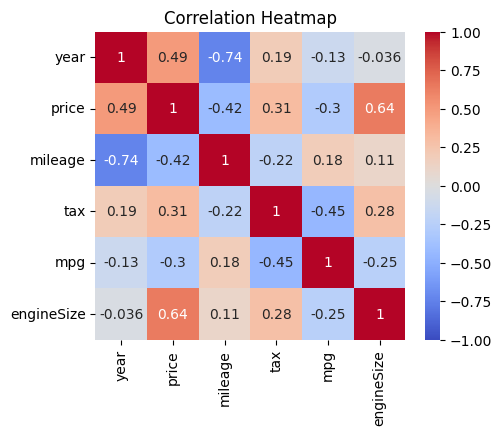

In [5]:
# Selecting numerical features only
df_numeric_gasoline = df_gasoline_car.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric_gasoline.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Insight from the correlation matrix
    
    - Variable that has the strongest positive correlations are Price and Engine Size
    - Variable MPG weak correlations which means that mpg hasn't have an impact to the price
    - Variable year and price has positive correlations which means the older the age of the car has impact on the price
    - Variable mileage and year has the weak negative correlations which means that mileage hasn't impact the price

In [6]:
#drop column on data set gasoline car
df_gasoline = df_gasoline_car.drop(df_gasoline_car.columns[[3,6]], axis=1)

In [7]:
df_gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   mileage       97712 non-null  int64  
 4   fuelType      97712 non-null  object 
 5   mpg           97712 non-null  float64
 6   engineSize    97712 non-null  float64
 7   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.0+ MB


In [8]:
#rearrange the column on gasoline dataset
df_gasoline.loc[:,['year', 'Manufacturer', 'model', 'fuelType', 'mpg', 'price']]

,year,Manufacturer,model,fuelType,mpg,price
0,2017,hyundi,I10,Petrol,60.1,7495
1,2017,volkswagen,Polo,Petrol,58.9,10989
2,2019,BMW,2 Series,Diesel,49.6,27990
3,2017,skoda,Yeti Outdoor,Diesel,62.8,12495
4,2017,ford,Fiesta,Petrol,54.3,7999
...,...,...,...,...,...,...
97707,2017,ford,Fiesta,Petrol,54.3,10447
97708,2014,BMW,3 Series,Diesel,61.4,14995
97709,2017,ford,Fiesta,Petrol,54.3,8950
97710,2017,vauxhall,Astra,Petrol,50.4,10700


In [9]:
print("\nDescriptive Statistics of Categorical Variables")
df_gasoline.describe(include=['object', 'category'])


Descriptive Statistics of Categorical Variables


,model,fuelType,Manufacturer
count,97712,97712,97712
unique,196,5,9
top,Fiesta,Petrol,ford
freq,6509,53982,17811


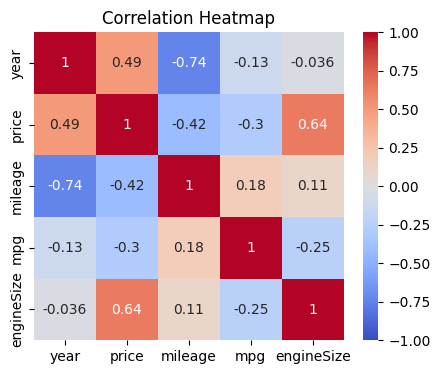

In [10]:
# Selecting numerical features only
df_numeric_gasoline = df_gasoline.select_dtypes(include=['float64', 'int64'])

# Heatmap on numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric_gasoline.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

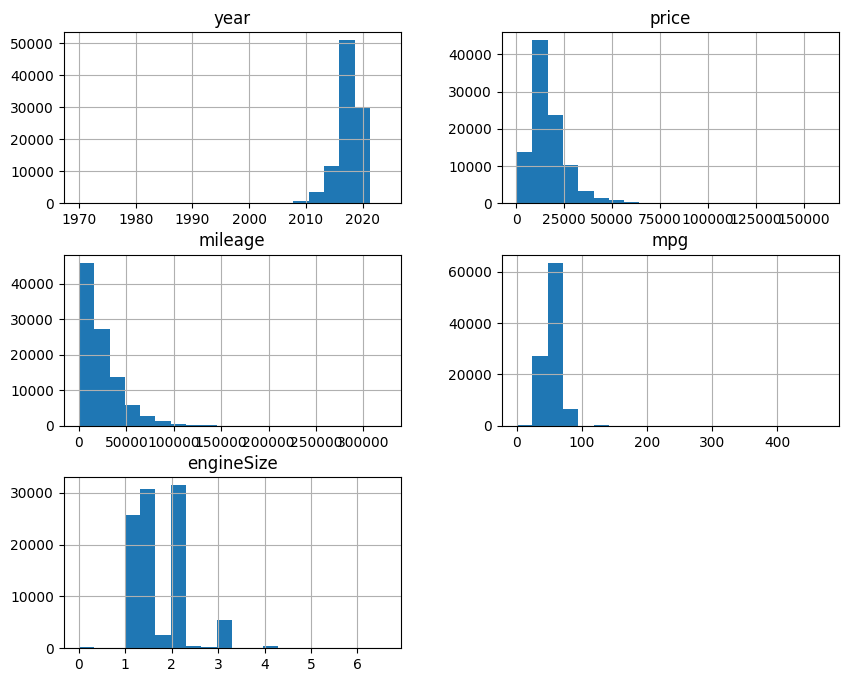

In [11]:
df_numeric_gasoline.hist(bins=20, figsize=(10, 8))
plt.show()

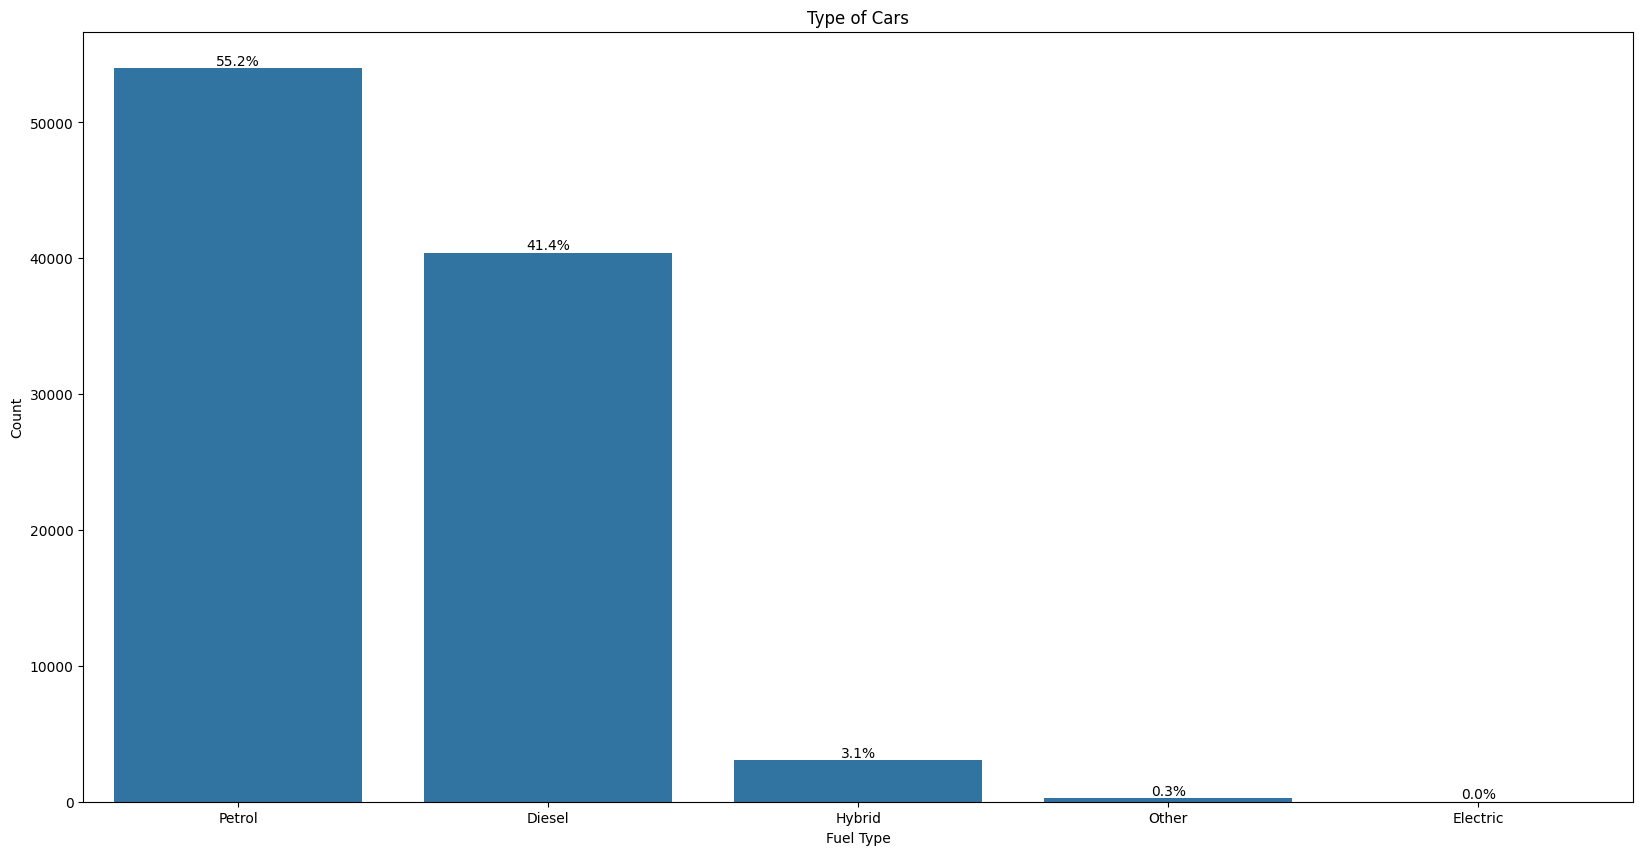

In [12]:
# Plot Survival with percentages on top of each bar
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='fuelType', data=df_gasoline)

# Calculate percentages and annotate the bars
total = len(df_gasoline)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() /2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Type of Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [13]:
df_o = df_gasoline[df_gasoline['fuelType'] == 'Other']
print(df_o)

           model  year  price  mileage fuelType    mpg  engineSize  \
445     3 Series  2017  15300    39428    Other  148.7         2.0   
544        Prius  2015  21990    30862    Other   64.2         1.8   
698        Prius  2019  24395     4092    Other   61.4         1.8   
895        Fabia  2017  10980    20000    Other   60.1         1.2   
1292       Ioniq  2017  12800    54698    Other   78.5         1.6   
...          ...   ...    ...      ...      ...    ...         ...   
96298     Tiguan  2017  25995    22801    Other   38.2         2.0   
96418       Aygo  2017   9495    23378    Other   67.3         1.0   
96562   3 Series  2016  14475    78878    Other  134.5         2.0   
97259       RAV4  2017  18000    26972    Other   43.5         2.0   
97544      Prius  2016  15795    47000    Other  134.5         1.8   

      Manufacturer  
445            BMW  
544         toyota  
698         toyota  
895          skoda  
1292        hyundi  
...            ...  
96298   volk

In [14]:
df_gasoline = df_gasoline.drop(df_gasoline.loc[df_gasoline['fuelType'] == 'Other'].index)
print(df_gasoline)

               model  year  price  mileage fuelType   mpg  engineSize  \
0                I10  2017   7495    11630   Petrol  60.1         1.0   
1               Polo  2017  10989     9200   Petrol  58.9         1.0   
2           2 Series  2019  27990     1614   Diesel  49.6         2.0   
3       Yeti Outdoor  2017  12495    30960   Diesel  62.8         2.0   
4             Fiesta  2017   7999    19353   Petrol  54.3         1.2   
...              ...   ...    ...      ...      ...   ...         ...   
97707         Fiesta  2017  10447     8337   Petrol  54.3         1.0   
97708       3 Series  2014  14995    25372   Diesel  61.4         2.0   
97709         Fiesta  2017   8950    19910   Petrol  54.3         1.2   
97710          Astra  2017  10700    24468   Petrol  50.4         1.4   
97711    Grandland X  2019  15798    10586   Diesel  48.7         1.5   

      Manufacturer  
0           hyundi  
1       volkswagen  
2              BMW  
3            skoda  
4             ford

In [15]:
df_o = df_gasoline[df_gasoline['fuelType'] == 'Electric']
print(df_o)

         model  year  price  mileage  fuelType    mpg  engineSize Manufacturer
12403   Ampera  2015  12999    34461  Electric  235.4         1.4     vauxhall
42264   Mondeo  2016  15975     9396  Electric   67.3         2.0         ford
50120   Mondeo  2016  15500    24531  Electric   67.3         2.0         ford
72119       i3  2015  17400    29465  Electric  470.8         1.0          BMW
76852       i3  2016  18999     9990  Electric  470.8         0.0          BMW
78929       i3  2017  18999    20321  Electric  470.8         0.0          BMW


In [16]:
df_gasoline = df_gasoline.drop(df_gasoline.loc[df_gasoline['fuelType'] == 'Electric'].index)
print(df_gasoline)

               model  year  price  mileage fuelType   mpg  engineSize  \
0                I10  2017   7495    11630   Petrol  60.1         1.0   
1               Polo  2017  10989     9200   Petrol  58.9         1.0   
2           2 Series  2019  27990     1614   Diesel  49.6         2.0   
3       Yeti Outdoor  2017  12495    30960   Diesel  62.8         2.0   
4             Fiesta  2017   7999    19353   Petrol  54.3         1.2   
...              ...   ...    ...      ...      ...   ...         ...   
97707         Fiesta  2017  10447     8337   Petrol  54.3         1.0   
97708       3 Series  2014  14995    25372   Diesel  61.4         2.0   
97709         Fiesta  2017   8950    19910   Petrol  54.3         1.2   
97710          Astra  2017  10700    24468   Petrol  50.4         1.4   
97711    Grandland X  2019  15798    10586   Diesel  48.7         1.5   

      Manufacturer  
0           hyundi  
1       volkswagen  
2              BMW  
3            skoda  
4             ford

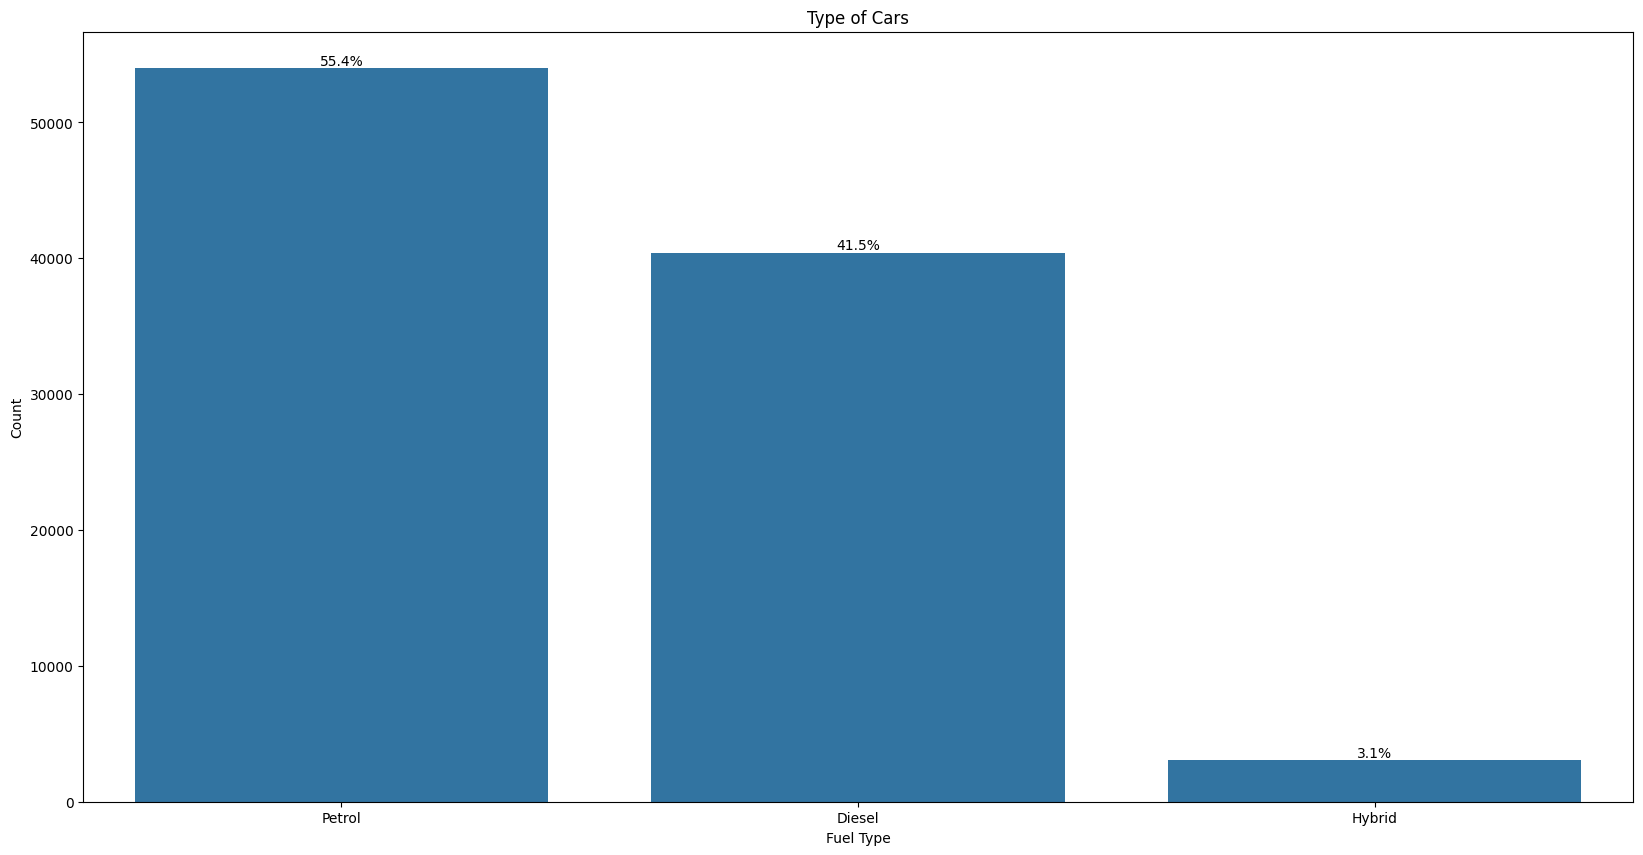

In [17]:
# Plot Survival with percentages on top of each bar
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='fuelType', data=df_gasoline)

# Calculate percentages and annotate the bars
total = len(df_gasoline)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() /2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Type of Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

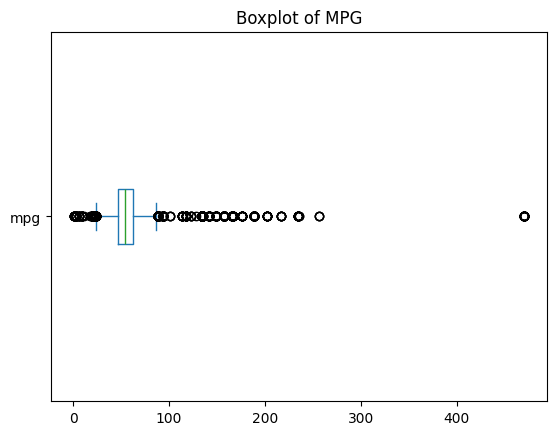

In [18]:
df_gasoline['mpg'].plot(kind = 'box', vert = False, title = "Boxplot of MPG");

In [19]:

# Drop rows where 'column_name' has zero values
df_gasoline = df_gasoline[df_gasoline['price'] != 0]
df_gasoline = df_gasoline[df_gasoline['mpg'] != 0]


Outlier Treatment

In [20]:
Q1 = df_gasoline['price'].quantile(0.25)
Q3 = df_gasoline['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
df_gasoline['price'] = df_gasoline['price'].clip(lower=lower_bound, upper=upper_bound)

In [21]:
Q1 = df_gasoline['mpg'].quantile(0.25)
Q3 = df_gasoline['mpg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
df_gasoline['mpg'] = df_gasoline['mpg'].clip(lower=lower_bound, upper=upper_bound)

Bivariate Analysis

In [22]:
corr = df_gasoline.corr(numeric_only = True)


<Axes: >

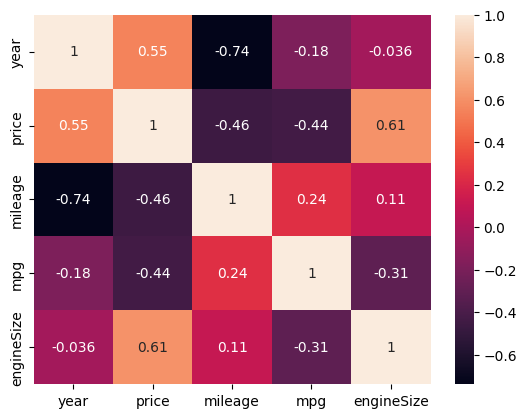

In [23]:
sns.heatmap(corr, annot = True)


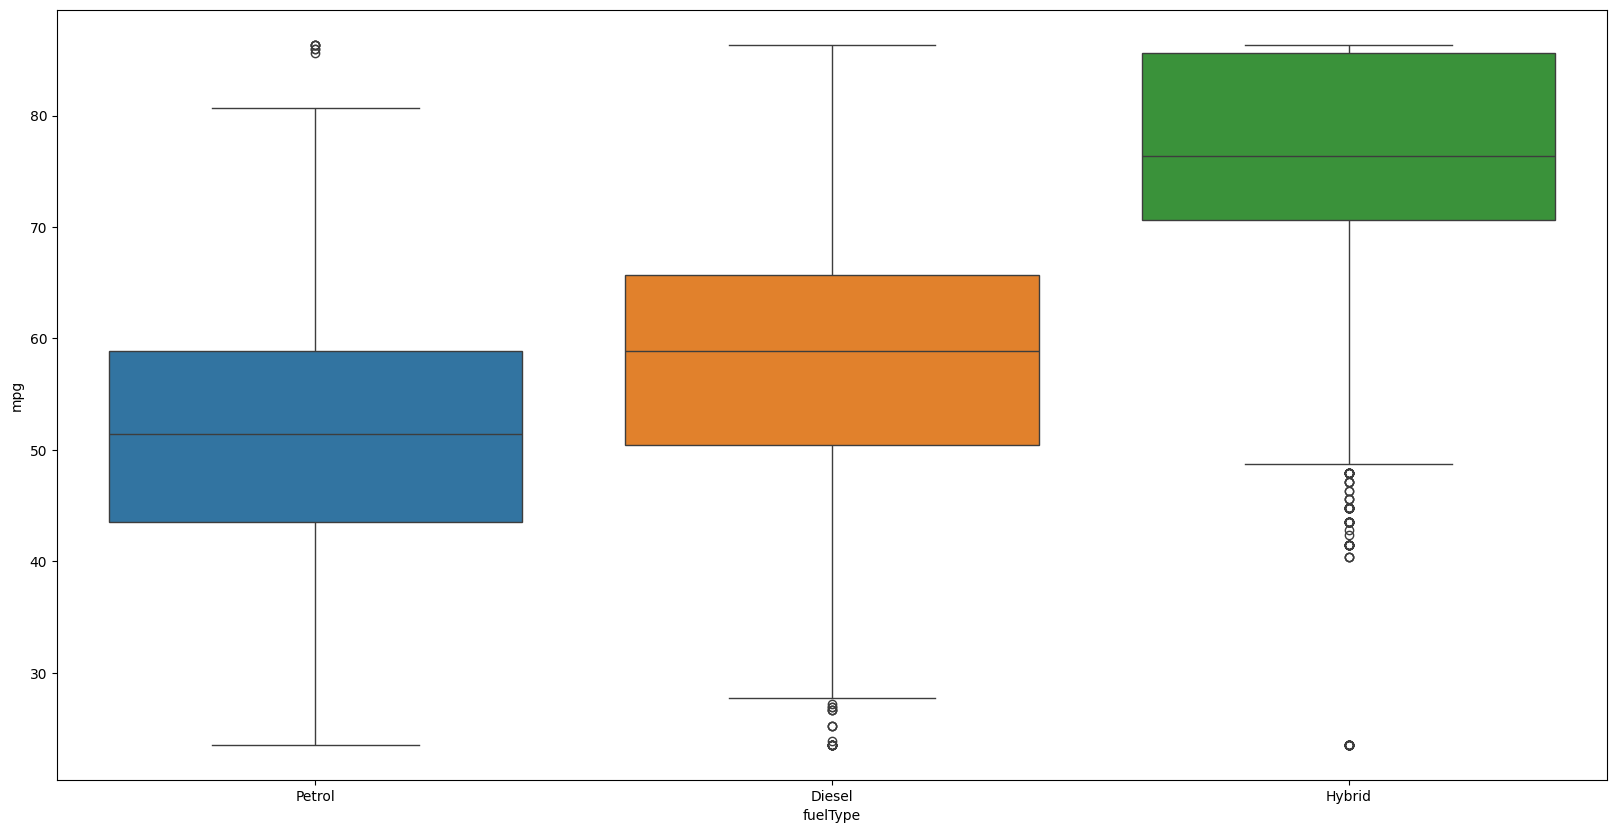

In [24]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'fuelType', y = 'mpg', data = df_gasoline, hue = "fuelType");


In [25]:
#normalized price data
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
df_gasoline['price_normalized'] = scaler.fit_transform(df_gasoline[['price']])

print(df_gasoline[['price', 'price_normalized']].head())

     price  price_normalized
0   7495.0         -1.081154
1  10989.0         -0.652693
2  27990.0          1.432100
3  12495.0         -0.468016
4   7999.0         -1.019350


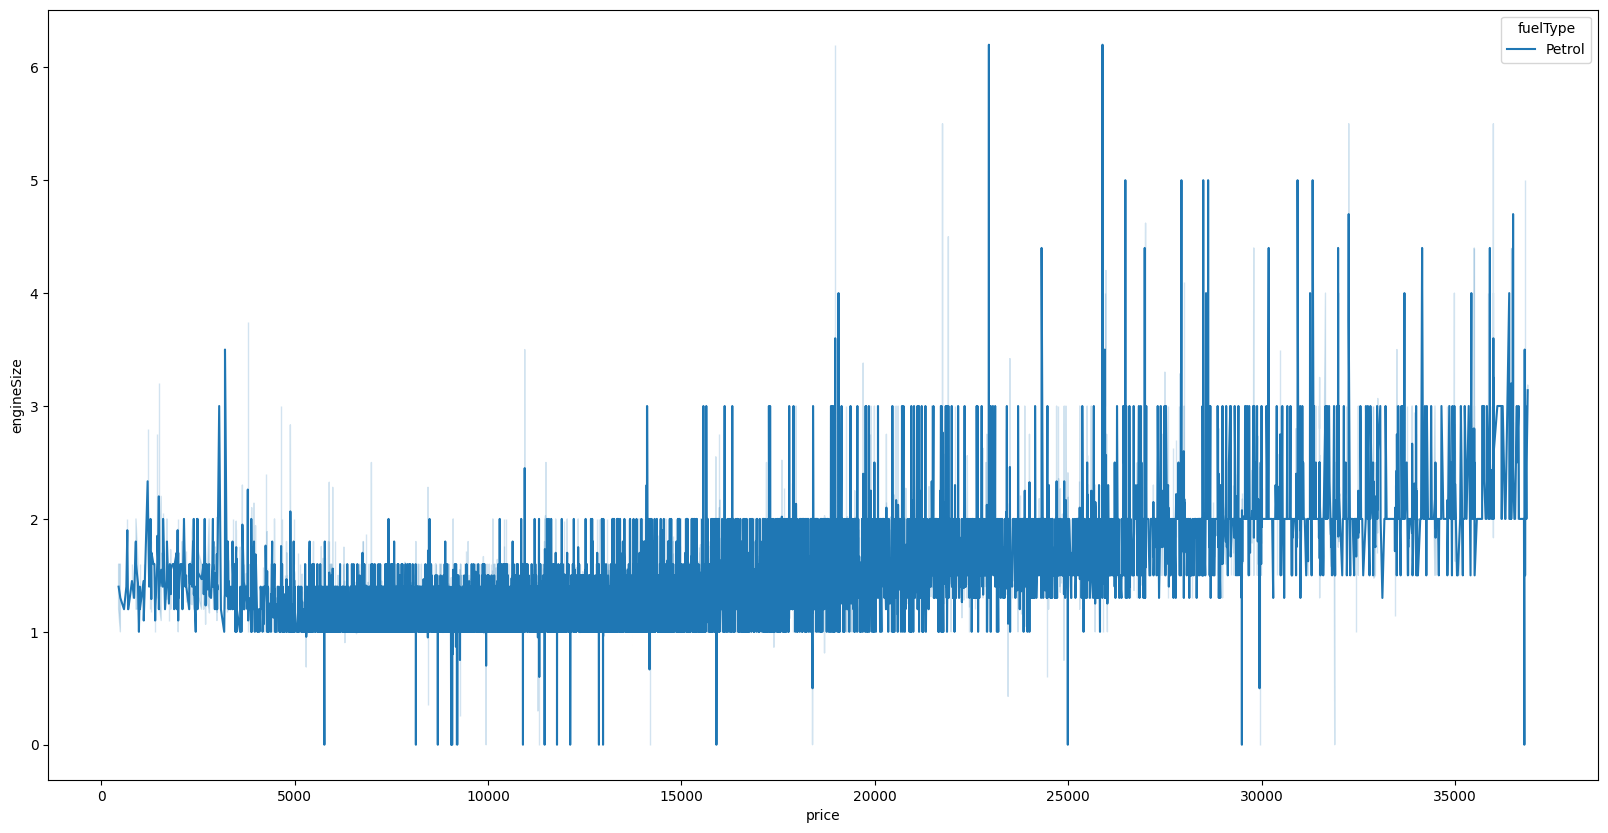

In [26]:
#Plot MPG with Fueltype = Petrol
plt.figure(figsize=(20, 10))
df_petrol = df_gasoline[df_gasoline['fuelType'] == "Petrol"]
sns.lineplot(x = 'price', y = 'engineSize', data = df_petrol, hue = "fuelType");

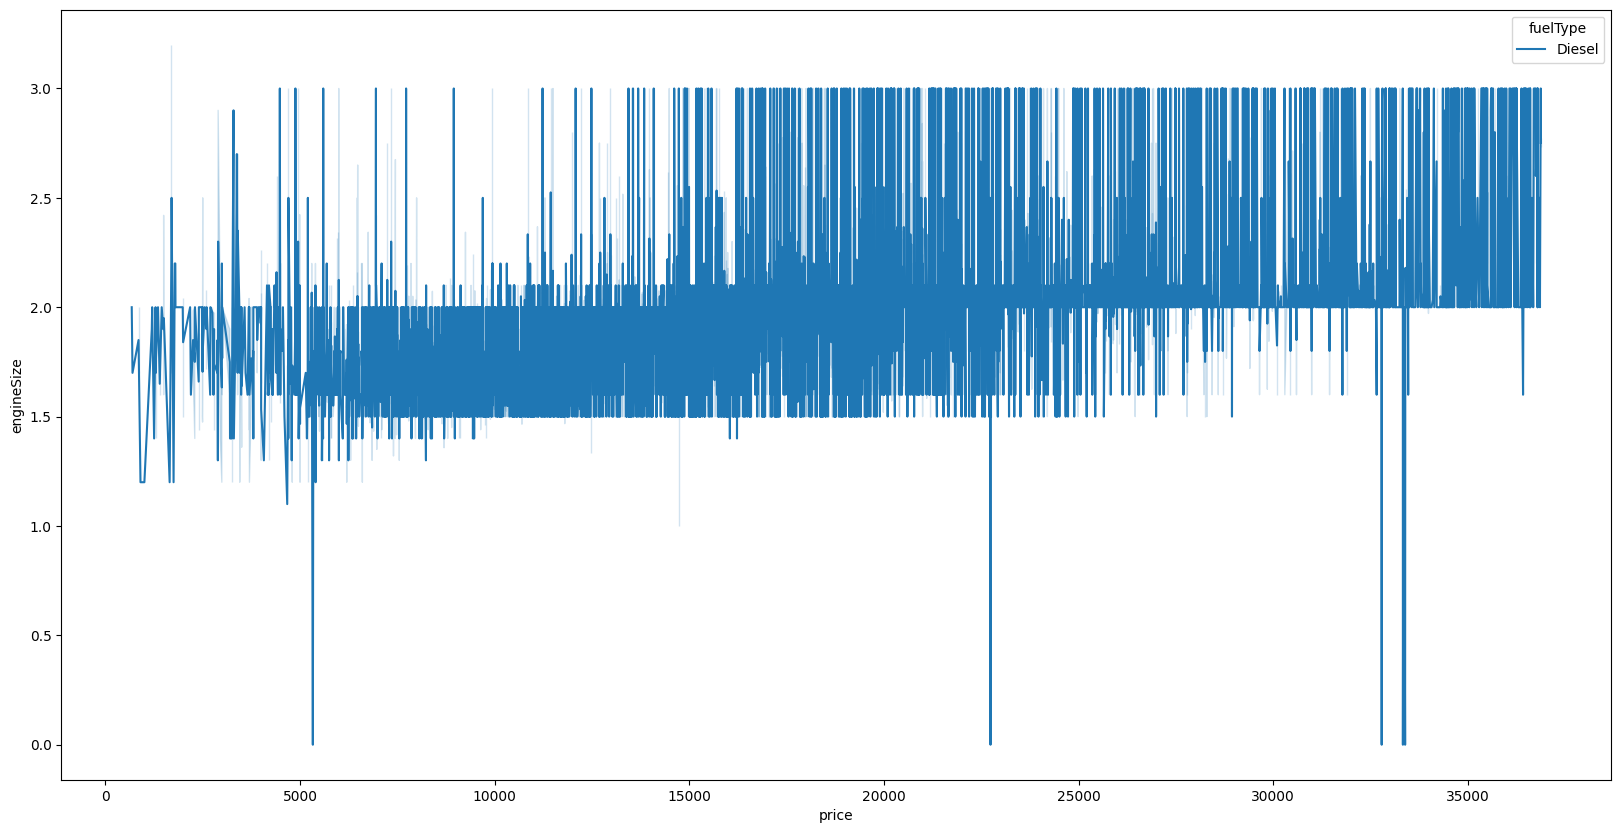

In [27]:
#Plot MPG with Fueltype = Diesel
plt.figure(figsize=(20, 10))
df_diesel = df_gasoline[df_gasoline['fuelType'] == "Diesel"]
sns.lineplot(x = 'price', y = 'engineSize', data = df_diesel, hue = "fuelType");


Splitting Data

In [ ]:
X = df_gasoline.drop(columns = {'mpg','model','fuelType','year','Manufacturer',})
y = df_gasoline['price']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [31]:
print(X_train.shape)
print(X_test.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(77968, 4)
(19492, 4)
(77968,)
(19492,)


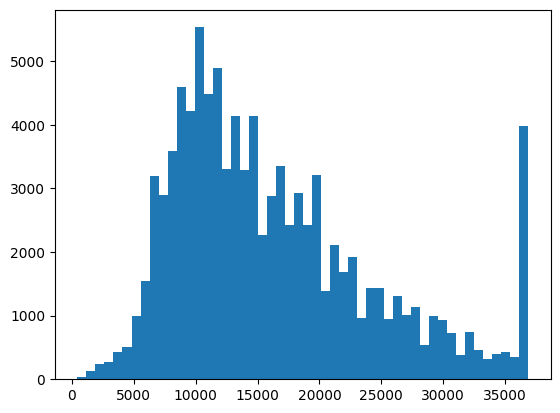

count    97460.000000
mean     16311.559753
std       8154.806468
min        450.000000
25%       9999.000000
50%      14450.000000
75%      20750.000000
max      36876.500000
Name: price, dtype: float64


In [32]:
import matplotlib.pyplot as plt  

plt.hist(y, bins=50)  # Check distribution of target variable
plt.show()

print(y.describe())  # Get min, max, mean, etc.

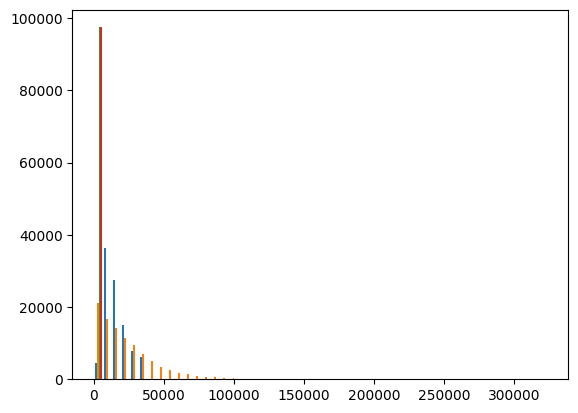

              price        mileage    engineSize  price_normalized
count  97460.000000   97460.000000  97460.000000      9.746000e+04
mean   16311.559753   23224.410250      1.665340      4.607665e-17
std     8154.806468   21065.600294      0.558594      1.000005e+00
min      450.000000       1.000000      0.000000     -1.945067e+00
25%     9999.000000    7682.500000      1.200000     -7.740947e-01
50%    14450.000000   17689.500000      1.600000     -2.282788e-01
75%    20750.000000   32500.000000      2.000000      5.442757e-01
max    36876.500000  323000.000000      6.600000      2.521831e+00


In [33]:
plt.hist(X, bins=50)  # Check distribution of target variable
plt.show()

print(X.describe())  # Get min, max, mean, etc.

In [34]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()

In [35]:
# fit the model
from sklearn.metrics import mean_squared_error


dummy.fit(X_train, y_train)

# R^2 of the model
dummy_r2 = dummy.score(X_train, y_train)
print("The value of dummy_r2 is {:.2f}".format(dummy_r2))

# Predictions on test 
dummy_predict = dummy.predict(X_test)

# rmse
dummy_rmse = mean_squared_error(y_test, dummy_predict)
print("The value of dummy rmse is {:.2f}".format(dummy_rmse))

The value of dummy_r2 is 0.00
The value of dummy rmse is 66195419.72


In [36]:
x = list(range(0, len(y_test)))

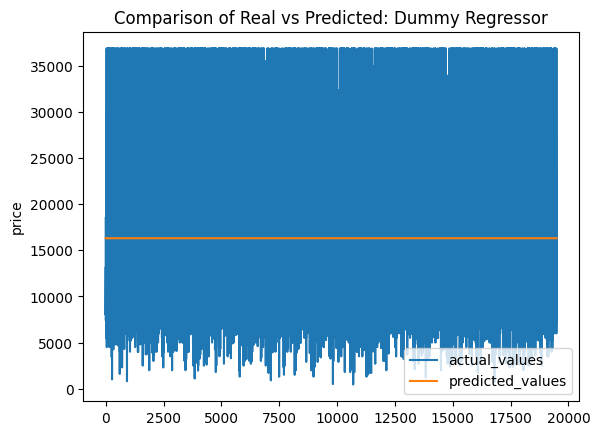

In [37]:
sns.lineplot(x = x, y = y_test, label = 'actual_values');
sns.lineplot(x = x, y = dummy_predict, label = 'predicted_values');

plt.title("Comparison of Real vs Predicted: Dummy Regressor");

Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr = Ridge(alpha=0.1)  # Adjust alpha as needed

In [39]:
# fit the model
lr.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test 
lr_predict = lr.predict(X_test)

# rmse
lr_rmse = mean_squared_error(y_test, lr_predict)
print("The value of lr rmse is {:.2f}".format(lr_rmse))

The value of lr_r2 is 1.00
The value of lr rmse is 0.00


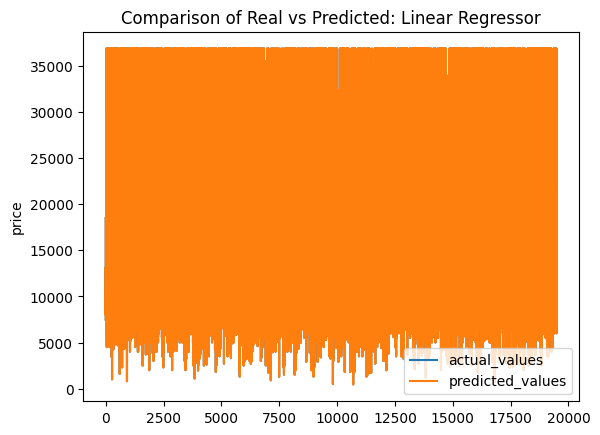

In [40]:
sns.lineplot(x = x, y = y_test, label = "actual_values");
sns.lineplot(x = x, y = lr_predict, label = "predicted_values");

plt.title("Comparison of Real vs Predicted: Linear Regressor");

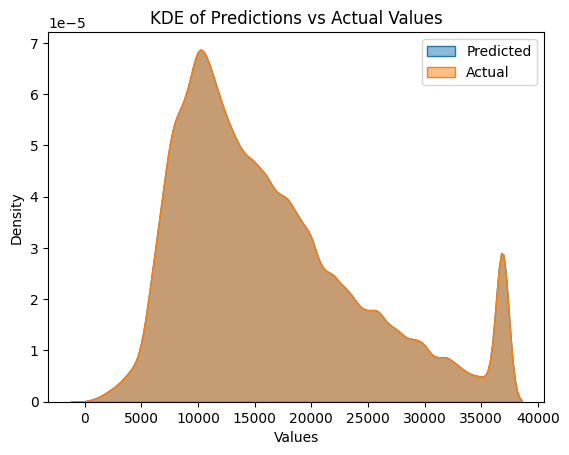

In [41]:
sns.kdeplot(lr_predict, label='Predicted', fill=True, alpha=0.5, bw_adjust=0.5);
sns.kdeplot(y_test, label='Actual', fill=True, alpha=0.5, bw_adjust=0.5);

plt.title("KDE of Predictions vs Actual Values");
plt.xlabel("Values");
plt.ylabel("Density");
plt.legend();
plt.show();

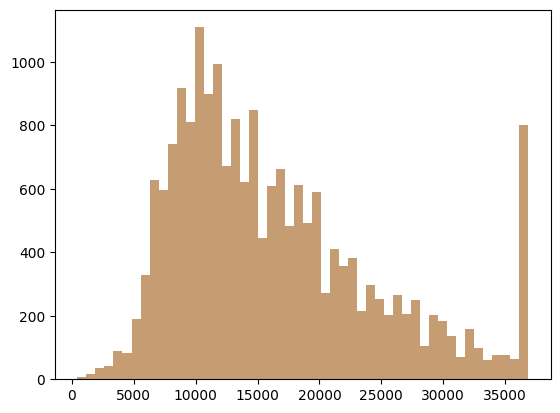

In [42]:
plt.hist(lr_predict, alpha = 0.5, bins= 50);
plt.hist(y_test, alpha = 0.5, bins = 50);

In [43]:
print("Intercept:", lr.intercept_)

Intercept: 0.0002522216527722776


In [44]:
print("Coefficients:", lr.coef_)


Coefficients: [ 9.99999985e-01 -1.16380498e-14  5.53554207e-10  1.26094992e-04]


Linear Regression on Categorical data

In [45]:
df_gasoline.select_dtypes("object").columns

Index(['model', 'fuelType', 'Manufacturer'], dtype='object')

In [46]:
df_gasoline.select_dtypes("object").agg(["nunique"])

,model,fuelType,Manufacturer
nunique,196,3,9


In [47]:
df_categorical = ['price','fuelType']
df_categorical_data = pd.DataFrame(df_gasoline[df_categorical])
mpg = df_gasoline['price']
print(df_categorical_data)

         price fuelType
0       7495.0   Petrol
1      10989.0   Petrol
2      27990.0   Diesel
3      12495.0   Diesel
4       7999.0   Petrol
...        ...      ...
97707  10447.0   Petrol
97708  14995.0   Diesel
97709   8950.0   Petrol
97710  10700.0   Petrol
97711  15798.0   Diesel

[97460 rows x 2 columns]


In [48]:
dummies = pd.get_dummies(df_categorical_data['fuelType'])
print(dummies)

       Diesel  Hybrid  Petrol
0       False   False    True
1       False   False    True
2        True   False   False
3        True   False   False
4       False   False    True
...       ...     ...     ...
97707   False   False    True
97708    True   False   False
97709   False   False    True
97710   False   False    True
97711    True   False   False

[97460 rows x 3 columns]


In [49]:
data_dummies = pd.concat([df_categorical_data, dummies], axis = 1)
print(data_dummies)

         price fuelType  Diesel  Hybrid  Petrol
0       7495.0   Petrol   False   False    True
1      10989.0   Petrol   False   False    True
2      27990.0   Diesel    True   False   False
3      12495.0   Diesel    True   False   False
4       7999.0   Petrol   False   False    True
...        ...      ...     ...     ...     ...
97707  10447.0   Petrol   False   False    True
97708  14995.0   Diesel    True   False   False
97709   8950.0   Petrol   False   False    True
97710  10700.0   Petrol   False   False    True
97711  15798.0   Diesel    True   False   False

[97460 rows x 5 columns]


In [50]:
del data_dummies['fuelType']

In [51]:
from sklearn import linear_model

f_with_trans = linear_model.LinearRegression(fit_intercept = False)
f_with_trans.fit(data_dummies, mpg)

LinearRegression(fit_intercept=False)

In [52]:
f_with_trans.coef_


array([1.00000000e+00, 7.14445380e-14, 6.12437933e-14, 6.53010386e-14])

Evaluation

In [53]:
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

train_error = mean_squared_error(y_train, train_predictions)
test_error = mean_squared_error(y_test, test_predictions)

print(f"Training Error: {train_error}")
print(f"Testing Error: {test_error}")

Training Error: 7.430806651411526e-20
Testing Error: 7.345459576883456e-20


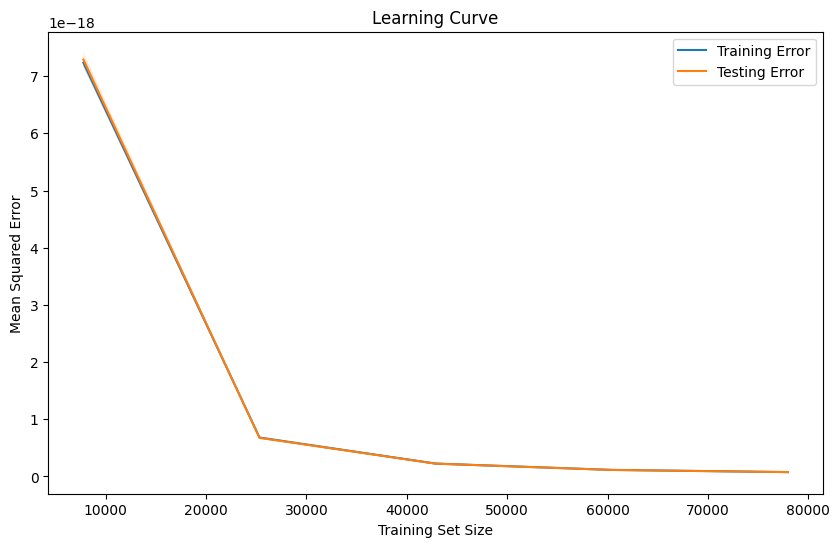

In [54]:
# Predict on training and test sets
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=5, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Print model evaluation
results = {
    "Training MSE": train_mse,
    "Testing MSE": test_mse,
    "Training R²": train_r2,
    "Testing R²": test_r2
}

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Error")
plt.plot(train_sizes, test_mean, label="Testing Error")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [55]:
r2_train = lr.score(X_train, y_train)  # R² on training data
r2_test = lr.score(X_test, y_test)  # R² on test data

print(f"Train R² Score: {r2_train}")
print(f"Test R² Score: {r2_test}")

Train R² Score: 1.0
Test R² Score: 1.0


Model Comparison

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Train models and store predictions
predictions = {}
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    predictions[name] = y_pred
    metrics[name] = {"MSE": mse, "R² Score": r2}


In [63]:
# Print model performance comparison
for name, metric in metrics.items():
    print(f"{name}:")
    print(f"   Mean Squared Error: {metric['MSE']:.4f}")
    print(f"   R² Score: {metric['R² Score']:.4f}\n")


Random Forest:
   Mean Squared Error: 71075.3190
   R² Score: 0.9989

Ridge Regression:
   Mean Squared Error: 0.0000
   R² Score: 1.0000

Decision Tree:
   Mean Squared Error: 89635.8561
   R² Score: 0.9986

Support Vector Machine:
   Mean Squared Error: 15170004.6541
   R² Score: 0.7708



Results

Conclusions
- Variable that has a big correlation are engine size and the price.
- MPG isn't have a positive correlation to the price variable
- Model that has a minimum error is Ridge Regression which is suit for analyze this type of dataset
- Mileage didn't really make an impact for the price variable


Future Work
- There's a unique pattern on the mileage and the price which is can be a next step analysis to detect the pattern of the Mileage or model of the car for the price variable
- Need more variable to make a model more complex and find a new variable that maybe impact to the car price